# Exploratory Data Analysis

# 0. Enviroment

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
pd.options.display.max_columns = None

# 1. Data

The dataset contains anonymized time series records of a machine's operation from an FPSO. The recorded variables are as follows:
1.	Cycle: Sequential identifier of measurement cycles.
2.	Preset_1 & Preset_2: Variables that control a specific operating point of the machine.
3.	Temperature: Temperature recorded in the equipment.
4.	Vibrations (X, Y & Z): Vibrations along the machine's axes.
5.	Frequency: Operating frequency of the machine.
6.	Fail: Variable indicating whether the machine is in a failure state at the given timestamp.

In [ ]:
df_vessel = pd.read_excel("../data/01_raw/oge_vessel_data.xlsx")

## 1.1. Understanding the dataset
Simple validation of schema, shape and presets.

In [51]:
df_vessel = df_vessel.sort_values("Cycle")

In [65]:
display(
    df_vessel.head(),
    df_vessel.shape,
    df_vessel.dtypes,
    df_vessel.isna().sum()
)

,Cycle,Preset_1,Preset_2,Temperature,Pressure,VibrationX,VibrationY,VibrationZ,Frequency,Fail
0,1,3,6,44.235186,47.657254,46.441769,64.820327,66.454520,44.483250,False
1,2,2,4,60.807234,63.172076,62.005951,80.714431,81.246405,60.228715,False
2,3,2,1,79.027536,83.032190,82.642110,98.254386,98.785196,80.993479,False
3,4,2,3,79.716242,100.508634,122.362321,121.363429,118.652538,80.315567,False
4,5,2,5,39.989054,51.764833,42.514302,61.037910,50.716469,64.245166,False


(800, 10)

Cycle            int64
Preset_1         int64
Preset_2         int64
Temperature    float64
Pressure       float64
VibrationX     float64
VibrationY     float64
VibrationZ     float64
Frequency      float64
Fail              bool
dtype: object

Cycle          0
Preset_1       0
Preset_2       0
Temperature    0
Pressure       0
VibrationX     0
VibrationY     0
VibrationZ     0
Frequency      0
Fail           0
dtype: int64

In [53]:
# Checking if there's incorrect cycle id
df_id = df_vessel[["Cycle"]].reset_index()

df_id["index"] = df_id["index"]+1
df_id["check"] = df_id.eval("index == Cycle")

assert df_id.query("check == False").shape[0] == 0

In [96]:
# number of presets of each type and its use frequency
display(
    df_vessel["Preset_1"].value_counts(),
    df_vessel["Preset_2"].value_counts(),
)

Preset_1
2    281
1    264
3    255
Name: count, dtype: int64

Preset_2
7    109
6    101
2    101
3    101
5    100
8    100
1     95
4     93
Name: count, dtype: int64

==========================================================================================================
- Preset 2 has more options. Is there a reason for this?
- How each OP (combination of Presets 1 and 2) impact the system (above all, temperature and frequency)?
- Which combination makes the equipment more suspectible to failure?

==========================================================================================================

## 1.2. Features

In [66]:
# Defining features
features = [
    "Temperature",
    "Pressure",
    "VibrationX",
    "VibrationY",
    "VibrationZ",
    "Frequency",
]

In [ ]:
# basic statistics
df_describe = df_vessel[features].describe()
df_describe

,Temperature,Pressure,VibrationX,VibrationY,VibrationZ,Frequency
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,69.263494,78.997945,73.860275,72.786878,71.866211,68.223449
std,25.536252,32.501834,31.229631,32.739745,27.844616,29.138702
min,2.089354,3.480279,3.846343,10.057744,18.784169,4.380101
25%,51.040134,55.508564,50.752461,48.523982,50.787638,45.861762
50%,65.906716,75.014848,69.394953,65.504770,69.319237,65.664252
75%,80.527220,99.302530,90.195059,94.075572,88.891205,90.097457
max,255.607829,189.995681,230.861142,193.569947,230.951134,178.090303


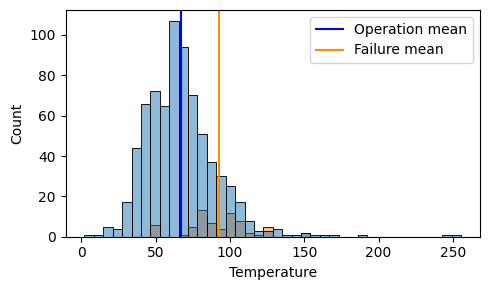

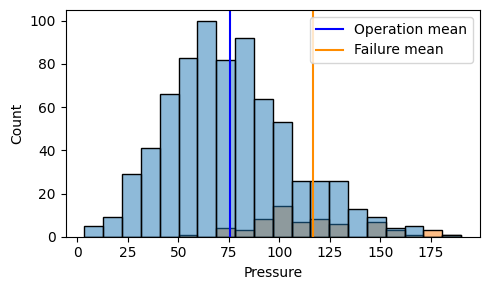

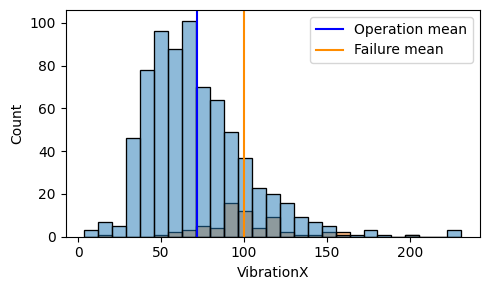

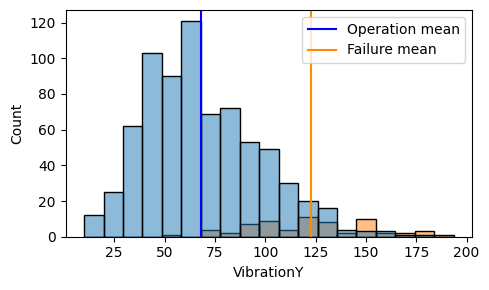

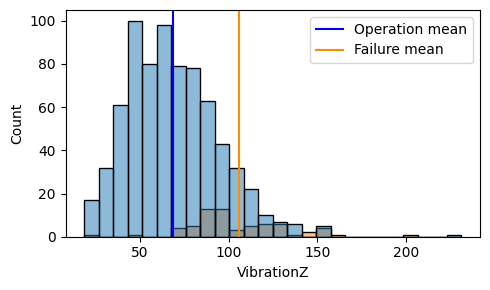

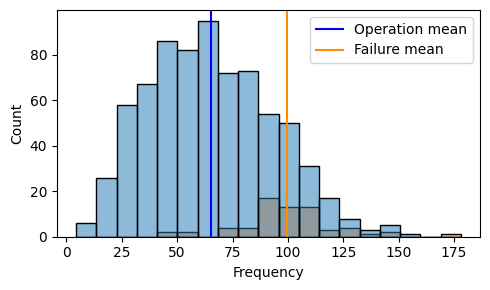

In [123]:
for feature in features:
    mean = df_vessel.groupby("Fail")[feature].mean()
    op_mean = mean.loc[False]
    fail_mean = mean.loc[True]

    plt.figure(figsize=(5, 3))
    sns.histplot(
        data=df_vessel,
        x=feature,
        hue="Fail",
    )

    plt.axvline(op_mean, color="blue")
    plt.axvline(fail_mean, color="darkorange")

    plt.legend([f"Operation mean", f"Failure mean"])

    plt.tight_layout()
    plt.show()